Simple Machine learning families
1. Linear Model Family
    a. Linear reg
     b. lasso reg
    c. elasticnet reg
    d. Ridge reg

2. Classification
    a. Logistic reg


Decision tree families
1. Decision tree regressor
2. Decision tree classifier

support vector machines
1. SVC
2. SVR

Ensemble families
1. Bagging
   a. random forest
       - RFC
       - RFR
2. Boosting
   a. Adaboost
   b.  Gradient boost
   c. XG boost

Naive Bayes families
1. Gaussian Naive based classifier
2. Multinomial NB
3. Bernoulli NB

KNN families


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_california_housing
cal_data = fetch_california_housing()


In [ ]:
cal_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
df = pd.DataFrame(cal_data.data, columns=cal_data.feature_names)

In [ ]:
df['Price'] = cal_data.target


In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# prompt: extract the column names

column_names = df.columns.tolist()
print(column_names)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Price']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:

df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [ ]:
df.dtypes


,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
Price,float64


In [ ]:
# Machine learning will only take numeric values
# Curse of dimensionality is introduced with one hot encoding with many categories
# Feature engineering has three parts. Modify the features (log, square, cube, square root). Combining two columns. Eliminate redundant features
#  VIF -Research on it
# For numerical data, histogram is used

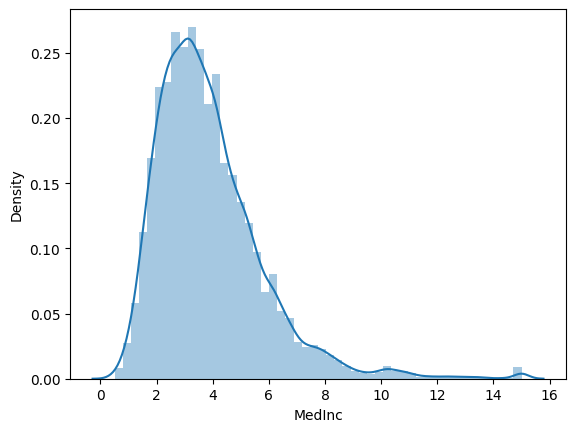

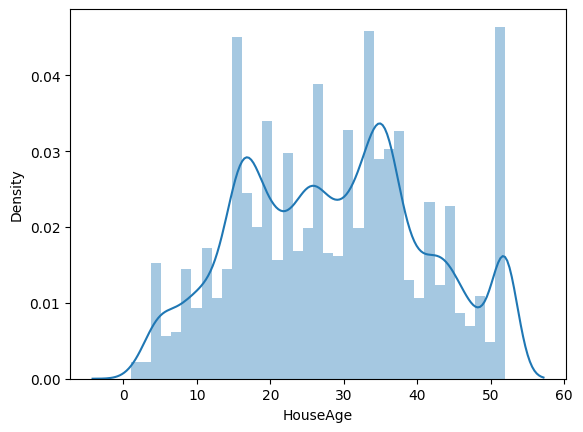

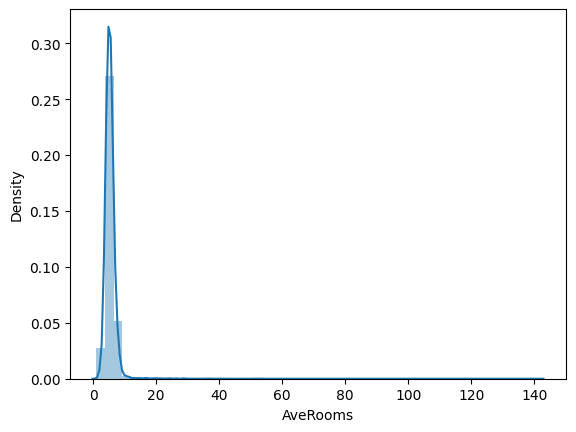

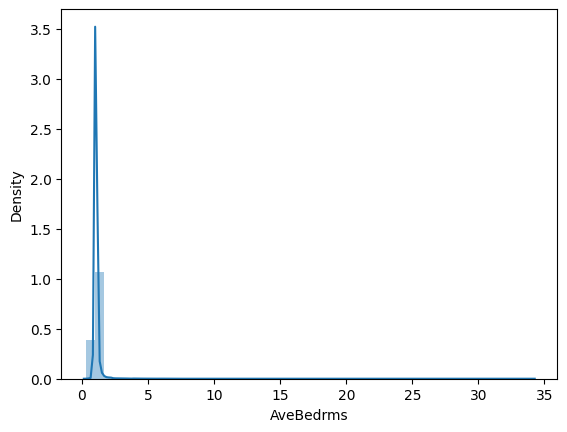

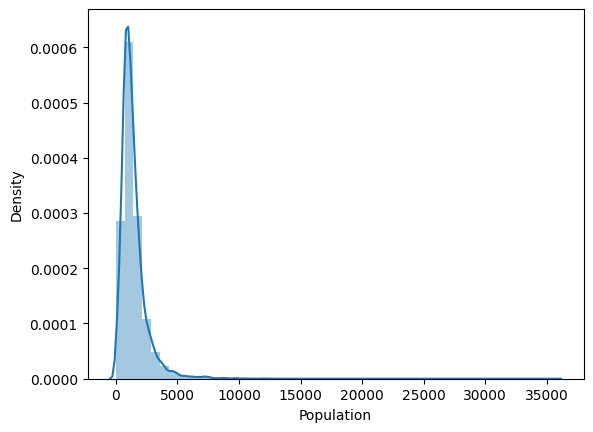

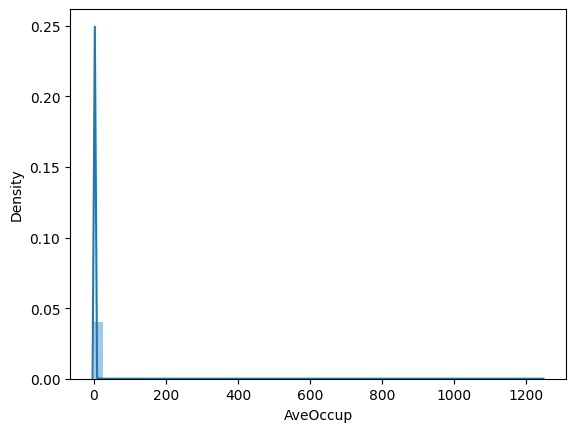

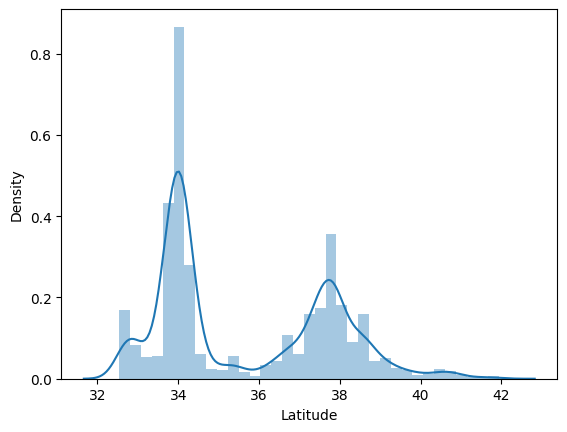

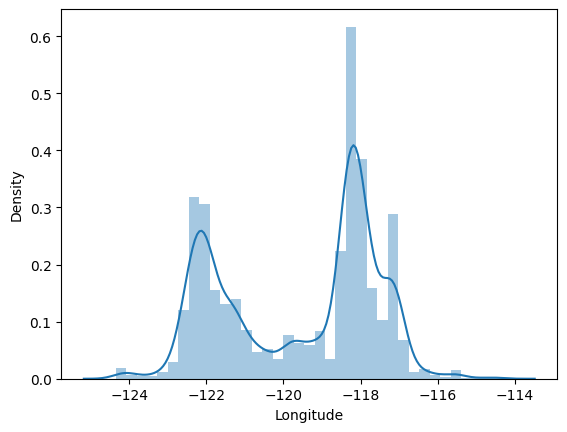

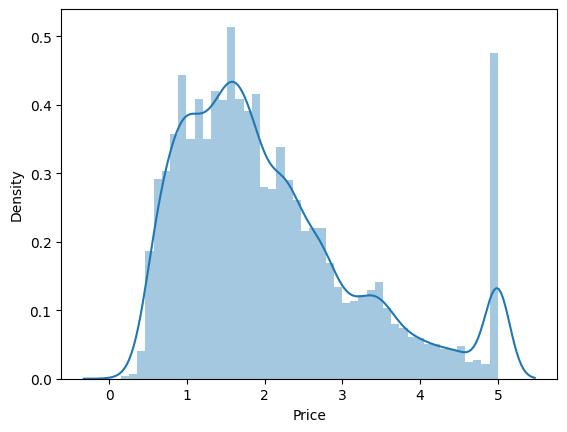

In [ ]:
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

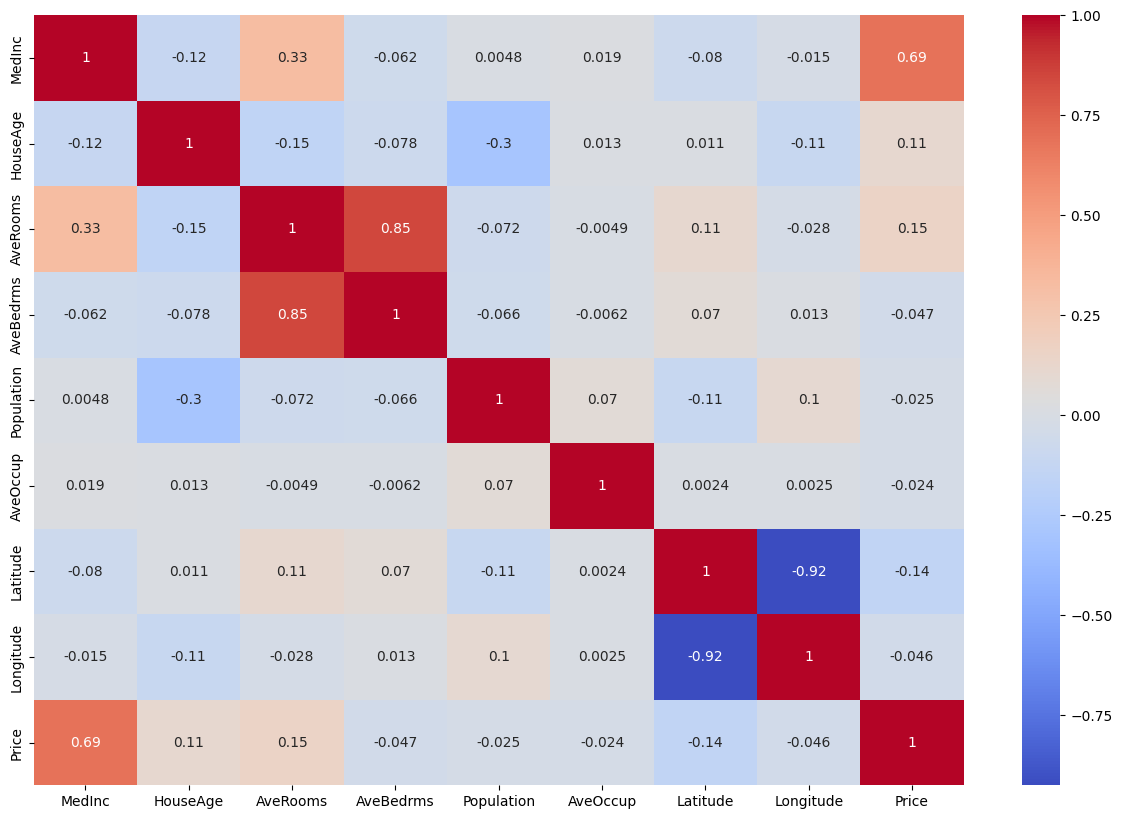

In [ ]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X= df.drop(['Price','AveOccup','Population'], axis=1)
y= df['Price']

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#

In [ ]:
# input data is 2 dimensional and output data is one dimensional
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 6), (4128, 6), (16512,), (4128,))

In [ ]:
# prompt: normalization
#  Standard Scaler ii) Normalizer iii) Min Max Scaler iv) Robust Scaler

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
# Build the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
lr.coef_,lr.intercept_

(array([ 0.85166903,  0.12225369, -0.29072457,  0.33669571, -0.90063027,
        -0.87338204]),
 2.0719469373788777)

In [ ]:
y_pred= lr.predict(X_test_sc)

In [ ]:
# r2 score explains that 43 percent of variability of price is unexplained
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 score', r2_score(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.5749693819995386
MSE 0.5569639378550827
RMSE 0.7463001660559125
MAE 0.5339676558382765


In [ ]:
import pickle
pickle.dump(scaler, open('scaler_model.pkl', 'wb'))
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [ ]:
import pickle

sc= pickle.load(open('scaler_model.pkl','rb'))
model=pickle.load(open('lr_model.pkl','rb'))

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
Unknown_data= {'MedInc':[3.5,4.7,8.2,9.1,12.5],
               'HouseAge': [10,5,7,15,22],
               'AveRooms' : [11,14,18,25,35],
               'AveBedrms': [3,6,7,4,10],
               'Latitude' : [33,34,37,40,36],
               'Longitude': [-118,-122,-111,-123,-124]}

In [ ]:
import pandas as pd
df1= pd.DataFrame(Unknown_data)
df1


,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude
0,3.5,10,11,3,33,-118
1,4.7,5,14,6,34,-122
2,8.2,7,18,7,37,-111
3,9.1,15,25,4,40,-123
4,12.5,22,35,10,36,-124


In [ ]:
sc_df1 = sc.transform(df1)

In [ ]:
sc_df1

array([[-0.19995116, -1.47659983,  2.33098436,  4.39360338, -1.23708157,
         0.78893904],
       [ 0.43022274, -1.87335854,  3.58763278, 11.31878834, -0.76904838,
        -1.20548375],
       [ 2.26822997, -1.71465506,  5.26316399, 13.62718332,  0.6350512 ,
         4.27917892],
       [ 2.7408604 , -1.07984112,  8.19534363,  6.70199837,  2.03915078,
        -1.70408945],
       [ 4.52635313, -0.52437892, 12.38417167, 20.55236828,  0.16701801,
        -2.20269515]])

In [ ]:
model.predict(sc_df1)

array([ 2.94787586,  6.72277994,  2.54288398,  3.79998488, 10.95567867])

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

lr= LinearRegression()
rd= Ridge(alpha=0.01)
ls= Lasso(alpha=0.01)
en= ElasticNet(alpha=0.01)


In [ ]:
lr.fit(X_train_sc, y_train)
print("coefficients",lr.coef_)
print("intercept",lr.intercept_)
y_pred_tr = lr.predict(X_train_sc)
y_pred_ts = lr.predict(X_test_sc)

print("----------------------------------------------------------")
print("Performance metrics on train data")
print("train score", r2_score(y_train, y_pred_tr))
print("mean_absolute_error",mean_absolute_error(y_train, y_pred_tr))
print("mean_squared_error",mean_squared_error(y_train, y_pred_tr))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_train, y_pred_tr)))
print("linear regression", lr.score(X_train_sc,y_train))


print("----------------------------------------------------------")
print("performance metrics on test data")
print("test score", r2_score(y_test, y_pred_ts))
print("mean_absolute_error",mean_absolute_error(y_test, y_pred_ts))
print("mean_squared_error",mean_squared_error(y_test, y_pred_ts))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_test, y_pred_ts)))
print("linear regression", lr.score(X_test_sc,y_test))



coefficients [ 0.85166903  0.12225369 -0.29072457  0.33669571 -0.90063027 -0.87338204]
intercept 2.0719469373788777
----------------------------------------------------------
Performance metrics on train data
train score 0.6112925687259451
mean_absolute_error 0.5295316628304096
mean_squared_error 0.5196156248877928
root_mean_squared_error 0.7208436896358272
linear regression 0.6112925687259451
----------------------------------------------------------
performance metrics on test data
test score 0.5749693819995386
mean_absolute_error 0.5339676558382765
mean_squared_error 0.5569639378550827
root_mean_squared_error 0.7463001660559125
linear regression 0.5749693819995386


In [ ]:
rd.fit(X_train_sc, y_train)
ls.fit(X_train_sc, y_train)
en.fit(X_train_sc, y_train)

ElasticNet(alpha=0.01)